1

In [42]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [43]:
# Allow GPU memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [44]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [45]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

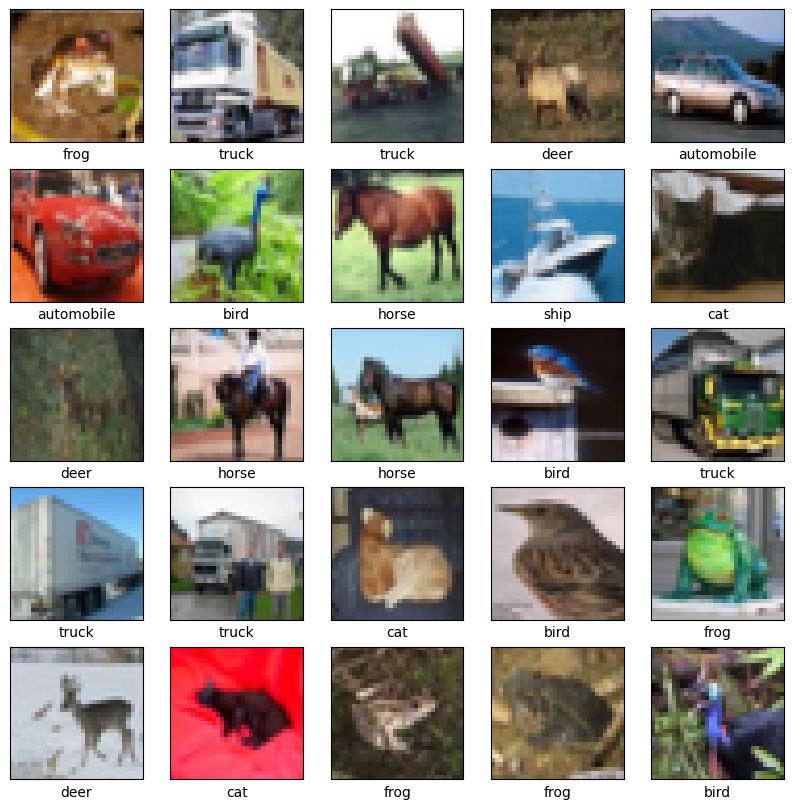

In [46]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [47]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_train_labels = ohe.fit_transform(train_labels.reshape(-1, 1)).toarray()
ohe_test_labels = ohe.transform(test_labels.reshape(-1, 1)).toarray()

In [68]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 3, 3, 64)        

In [73]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [74]:
history = model.fit(train_images, ohe_train_labels, epochs=25, 
                    validation_data=(test_images, ohe_test_labels))

Epoch 1/25
1563/1563 [==============================] - 36s 22ms/step - loss: 1.0674 - accuracy: 0.6234 - val_loss: 1.0249 - val_accuracy: 0.6363
Epoch 2/25
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9299 - accuracy: 0.6736 - val_loss: 0.9410 - val_accuracy: 0.6744
Epoch 3/25
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8266 - accuracy: 0.7113 - val_loss: 0.8744 - val_accuracy: 0.7000
Epoch 4/25
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7560 - accuracy: 0.7342 - val_loss: 0.8606 - val_accuracy: 0.7026
Epoch 5/25
1563/1563 [==============================] - 536s 343ms/step - loss: 0.6937 - accuracy: 0.7570 - val_loss: 0.8436 - val_accuracy: 0.7114
Epoch 6/25
1563/1563 [==============================] - 6766s 4s/step - loss: 0.6452 - accuracy: 0.7736 - val_loss: 0.8226 - val_accuracy: 0.7285
Epoch 7/25
1563/1563 [==============================] - 1314s 841ms/step - loss: 0.5948 - accuracy: 0.7912 - val_loss: 0.8

313/313 - 2s - loss: 1.3942 - accuracy: 0.7106 - 2s/epoch - 7ms/step


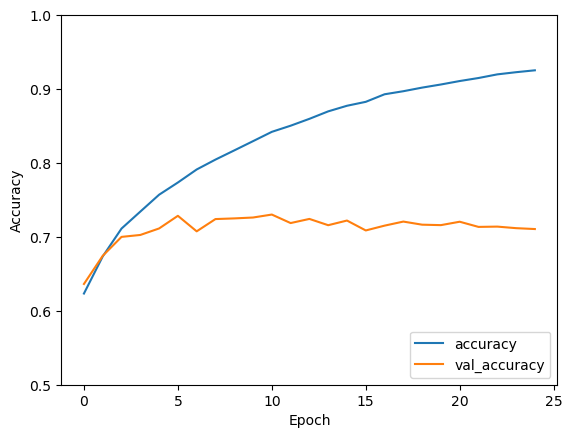

In [76]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, ohe_test_labels, verbose=2)

In [77]:
print(test_acc)

0.7106000185012817


2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import time
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [3]:


mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Original pixel values as features
X_original = mnist.data.astype(float)

# Perform PCA for feature extraction
n_components = 50 
pca = PCA(n_components=n_components, random_state=42)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_original)

# Fit PCA to the standardized data
X_pca = pca.fit_transform(X_standardized)

X_pca = X_pca[:10000]
y = y[:10000]

/Users/fahmiyansyah/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Split data into 90% training and 10% testing
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Print the dimensions of the training and testing sets
print("Ratio 90:10")
print("Training data dimensions:")
print("X_train:", X_train_cnn.shape)
print("y_train:", y_train_cnn.shape)
print("Testing data dimensions:")
print("X_test:", X_test_cnn.shape)
print("y_test:", y_test_cnn.shape)

Ratio 90:10
Training data dimensions:
X_train: (9000, 50)
y_train: (9000,)
Testing data dimensions:
X_test: (1000, 50)
y_test: (1000,)


In [10]:
# Load and preprocess the MNIST dataset
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train_cnn = x_train_cnn.astype('float32') / 255.0
x_test_cnn = x_test_cnn.astype('float32') / 255.0

# One-hot encode the labels
y_train_cnn = to_categorical(y_train_cnn, 10)
y_test_cnn = to_categorical(y_test_cnn, 10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure training time for CNN
start_time = time.time()
model.fit(x_train_cnn.reshape(-1, 28, 28, 1), y_train_cnn, epochs=10, batch_size=64, validation_split=0.2)
training_time = time.time() - start_time

# Measure testing time for CNN
start_time = time.time()
test_loss, test_accuracy = model.evaluate(x_test_cnn.reshape(-1, 28, 28, 1), y_test_cnn)
testing_time = time.time() - start_time

# Print the results for CNN
print("CNN - Training Time:", training_time, "seconds")
print("CNN - Testing Time:", testing_time, "seconds")
print("CNN - Test Accuracy:", test_accuracy)


Epoch 1/10
750/750 [==============================] - 17s 22ms/step - loss: 0.2747 - accuracy: 0.9156 - val_loss: 0.0715 - val_accuracy: 0.9777
Epoch 2/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0989 - accuracy: 0.9701 - val_loss: 0.0517 - val_accuracy: 0.9842
Epoch 3/10
750/750 [==============================] - 17s 23ms/step - loss: 0.0740 - accuracy: 0.9782 - val_loss: 0.0424 - val_accuracy: 0.9867
Epoch 4/10
750/750 [==============================] - 17s 22ms/step - loss: 0.0582 - accuracy: 0.9827 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 5/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.0351 - val_accuracy: 0.9897
Epoch 6/10
750/750 [==============================] - 16s 21ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.0355 - val_accuracy: 0.9904
Epoch 7/10
750/750 [==============================] - 17s 22ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0365 - val_accuracy:

313/313 [==============================] - 2s 5ms/step


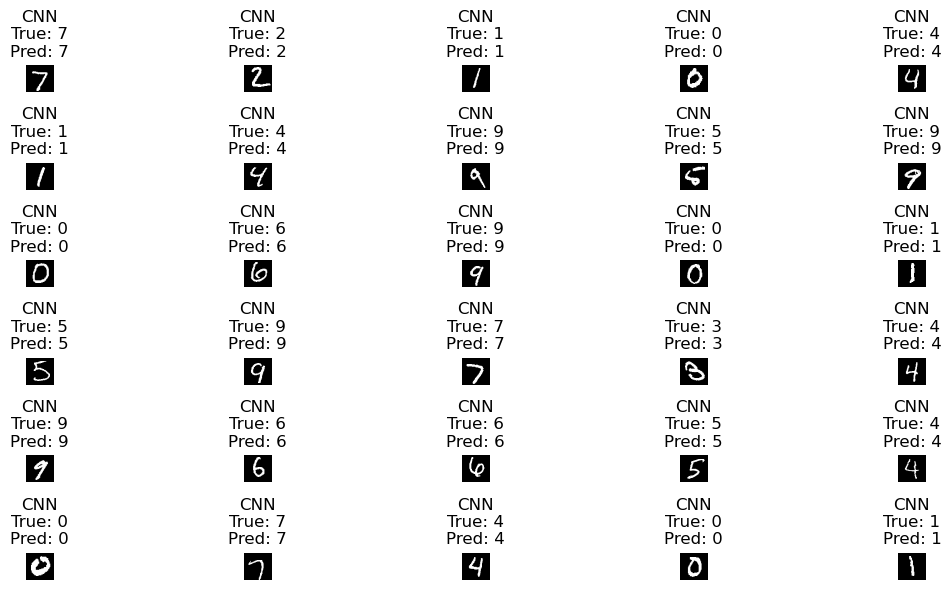

In [11]:
# Select multiple samples of test data to display
n_samples_to_display = 30

# Get model predictions for the test data
y_pred_cnn = model.predict(x_test_cnn.reshape(-1, 28, 28, 1))

# Initialize correct labels (ground truth) and predicted labels
true_labels = np.argmax(y_test_cnn, axis=1)  # Convert one-hot encoded labels to integers
predicted_labels = np.argmax(y_pred_cnn, axis=1)  # Convert one-hot encoded predictions to integers

plt.figure(figsize=(12, 6))
for i in range(min(n_samples_to_display, len(true_labels), len(predicted_labels))):
    plt.subplot(6, 5, i + 1)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap="gray")  # Display the original image
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # If the prediction is correct, the text is black
    else:
        text_color = 'red'  # If the prediction is wrong, the text is red
    plt.title(f"CNN\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()